In [1]:
import os

os.environ["TRANSFORMERS_CACHE"] = "/kaggle/temp/hf_cache"
os.environ["HF_HOME"] = "/kaggle/temp/hf_cache"
os.environ["TORCH_HOME"] = "/kaggle/temp/torch_cache"

In [2]:
import pandas as pd

In [3]:
df_meta = pd.read_csv("/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_meta_data.csv")

In [4]:
df_meta.head()

,Diseases,Patient Age,Patient Gender,Image Index,Encoded
0,['Infiltration'],3,M,00020058_000.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"['Atelectasis', 'Pleural_Thickening']",3,M,00029976_000.png,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"['Infiltration', 'Nodule']",3,M,00018145_003.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,['Effusion'],3,F,00010953_002.png,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,['Emphysema'],2,F,00021212_009.png,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [5]:
import json

with open("/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/disease_details.json") as f:
    data = json.load(f)


In [6]:
data

{'diseases': ['Emphysema',
  'Infiltration',
  'Pleural_Thickening',
  'Pneumothorax',
  'Cardiomegaly',
  'Atelectasis',
  'Edema',
  'Effusion',
  'Consolidation',
  'Mass',
  'Nodule',
  'Fibrosis',
  'Pneumonia',
  'Hernia']}

In [7]:
target_labels = data["diseases"]

In [8]:
target_labels

['Emphysema',
 'Infiltration',
 'Pleural_Thickening',
 'Pneumothorax',
 'Cardiomegaly',
 'Atelectasis',
 'Edema',
 'Effusion',
 'Consolidation',
 'Mass',
 'Nodule',
 'Fibrosis',
 'Pneumonia',
 'Hernia']

In [9]:
path_prefix = "/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/"

In [10]:
df_meta.head()

,Diseases,Patient Age,Patient Gender,Image Index,Encoded
0,['Infiltration'],3,M,00020058_000.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,"['Atelectasis', 'Pleural_Thickening']",3,M,00029976_000.png,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
2,"['Infiltration', 'Nodule']",3,M,00018145_003.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
3,['Effusion'],3,F,00010953_002.png,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,['Emphysema'],2,F,00021212_009.png,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [11]:
df_meta["image_path"] = df_meta["Image Index"].apply(lambda x: path_prefix+x)

In [12]:
df_meta.head()

,Diseases,Patient Age,Patient Gender,Image Index,Encoded,image_path
0,['Infiltration'],3,M,00020058_000.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",/kaggle/input/nih-sampled-data-with-localizati...
1,"['Atelectasis', 'Pleural_Thickening']",3,M,00029976_000.png,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]",/kaggle/input/nih-sampled-data-with-localizati...
2,"['Infiltration', 'Nodule']",3,M,00018145_003.png,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]",/kaggle/input/nih-sampled-data-with-localizati...
3,['Effusion'],3,F,00010953_002.png,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]",/kaggle/input/nih-sampled-data-with-localizati...
4,['Emphysema'],2,F,00021212_009.png,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",/kaggle/input/nih-sampled-data-with-localizati...


In [13]:
import ast

df_meta["Encoded"] = df_meta["Encoded"].apply(lambda x: ast.literal_eval(x))

In [14]:
from skmultilearn.model_selection import iterative_train_test_split
import numpy as np
import pandas as pd

# --- Prepare input arrays ---
y = np.stack(df_meta["Encoded"].values)        # shape: (n_samples, n_labels)
X = df_meta.drop(columns=["Encoded"]).to_numpy()

In [15]:
X

array([["['Infiltration']", 3, 'M', '00020058_000.png',
        '/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/00020058_000.png'],
       ["['Atelectasis', 'Pleural_Thickening']", 3, 'M',
        '00029976_000.png',
        '/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/00029976_000.png'],
       ["['Infiltration', 'Nodule']", 3, 'M', '00018145_003.png',
        '/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/00018145_003.png'],
       ...,
       ["['No Finding']", 2, 'M', '00008190_001.png',
        '/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/00008190_001.png'],
       ["['Effusion', 'Infiltration']", 2, 'M', '00019087_008.png',
        '/kaggle/input/nih-sampled-data-with-localization/data_train/kaggle/working/data/train_data/00019087_008.png'],
       ["['Nodule']", 4, 'F', '00003126_005.png',
        '

In [16]:
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:


# --- Perform iterative stratified split ---
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

# --- Convert back to DataFrames ---
base_cols = list(df_meta.drop(columns=["Encoded"]).columns)
num_labels = y.shape[1]                         # will be 14 now
label_cols = list(range(num_labels))            # [0 ... 13]

# TRAIN
df_train_final = pd.DataFrame(
    np.hstack([X_train, y_train]),
    columns=base_cols + label_cols
)
df_train_final["Encoded"] = df_train_final[label_cols].values.tolist()
df_train_final.drop(columns=label_cols, inplace=True)

# Test
df_test_final = pd.DataFrame(
    np.hstack([X_test, y_test]),
    columns=base_cols + label_cols
)
df_test_final["Encoded"] = df_test_final[label_cols].values.tolist()
df_test_final.drop(columns=label_cols, inplace=True)

print(f"Train shape: {df_train_final.shape} | Test shape: {df_test_final.shape}")


Train shape: (16644, 6) | Test shape: (4161, 6)


In [18]:
y = np.stack(df_train_final["Encoded"].values)        # shape: (n_samples, n_labels)
X = df_train_final.drop(columns=["Encoded"]).to_numpy()

In [19]:


# --- Perform iterative stratified split ---
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.2)

# --- Convert back to DataFrames ---
base_cols = list(df_meta.drop(columns=["Encoded"]).columns)
num_labels = y.shape[1]                         # will be 14 now
label_cols = list(range(num_labels))            # [0 ... 13]

# TRAIN
df_train_final = pd.DataFrame(
    np.hstack([X_train, y_train]),
    columns=base_cols + label_cols
)
df_train_final["Encoded"] = df_train_final[label_cols].values.tolist()
df_train_final.drop(columns=label_cols, inplace=True)

# Test
df_val_final = pd.DataFrame(
    np.hstack([X_test, y_test]),
    columns=base_cols + label_cols
)
df_val_final["Encoded"] = df_val_final[label_cols].values.tolist()
df_val_final.drop(columns=label_cols, inplace=True)

print(f"Train shape: {df_train_final.shape} | Val shape: {df_val_final.shape}")


Train shape: (13315, 6) | Val shape: (3329, 6)


In [20]:
df_train_final = df_train_final.drop(["Diseases","Image Index"], axis =1)

In [21]:
df_train_final.head()

,Patient Age,Patient Gender,image_path,Encoded
0,3,M,/kaggle/input/nih-sampled-data-with-localizati...,"[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1,M,/kaggle/input/nih-sampled-data-with-localizati...,"[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
2,3,F,/kaggle/input/nih-sampled-data-with-localizati...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
3,3,F,/kaggle/input/nih-sampled-data-with-localizati...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,4,F,/kaggle/input/nih-sampled-data-with-localizati...,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]"


In [22]:
df_train_final.dropna(inplace=True)

In [23]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoImageProcessor

class MedicalImageTransformerEncoder(nn.Module):
    def __init__(self,
                 model_name="microsoft/rad-dino",
                 proj_dim=256,
                 adapter_dim=128,
                 freeze_backbone=True):
        super().__init__()

        # Load pretrained Swin Transformer backbone
        self.backbone = AutoModel.from_pretrained(model_name, trust_remote_code=True)
        self.processor = AutoImageProcessor.from_pretrained(model_name)

        # Optionally freeze the backbone
        if freeze_backbone:
            for param in self.backbone.parameters():
                param.requires_grad = False

        # Hidden dimension of Swin model
        hidden_dim = self.backbone.config.hidden_size

        # Lightweight LoRA-style adapter
        self.adapter = nn.Sequential(
            nn.Linear(hidden_dim, adapter_dim),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(adapter_dim, hidden_dim)
        )
        self.adapter_gate = nn.Parameter(torch.tensor(0.1))  # start small

        # Projection head for downstream fusion or retrieval
        self.projection = nn.Linear(hidden_dim, proj_dim)

        # Optional normalization
        self.norm = nn.LayerNorm(hidden_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, pixel_values):
        """
        Args:
            pixel_values (torch.Tensor): [B, 3, H, W]
        Returns:
            emb (torch.Tensor): [B, proj_dim] - projected embedding
            pooled (torch.Tensor): [B, hidden_dim] - pooled Swin features
        """
        # Extract features from Swin backbone
        outputs = self.backbone(pixel_values=pixel_values)

        # Swin outputs `last_hidden_state` of shape [B, num_patches, hidden_dim]
        hidden_states = outputs.last_hidden_state

        # Global average pooling across spatial patches
        pooled = hidden_states.mean(dim=1)  # [B, hidden_dim]

        # Normalize (optional, improves stability)
        pooled = self.norm(pooled)

        # Adapter fine-tuning (trainable)
        adapted = pooled + self.adapter_gate * self.adapter(pooled)

        # Project to lower-dimensional embedding
        adapted = self.dropout(adapted)
        emb = self.projection(adapted)

        return emb, pooled


/usr/local/lib/python3.11/dist-packages/transformers/utils/hub.py:111: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
2026-01-13 05:58:05.091863: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768283885.287926      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768283885.347056      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
X_train = df_train_final.drop("Encoded", axis=1)
y_train = df_train_final["Encoded"]

In [25]:
path_test = X_train["image_path"].iloc[0]

In [26]:
from PIL import Image

image_test = Image.open(path_test)

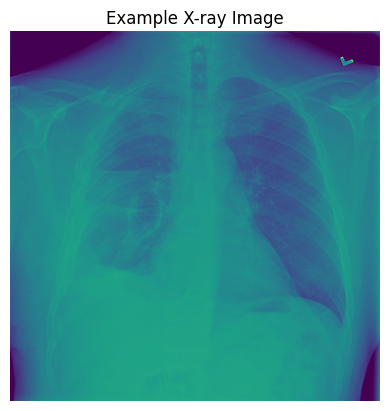

In [27]:
import matplotlib.pyplot as plt

plt.imshow(image_test)
plt.axis("off")
plt.title("Example X-ray Image")
plt.show()

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import pandas as pd
from PIL import Image
import timm
import numpy as np

/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pydantic/_internal/_generate_schema.py:2225: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [29]:
import os
import time
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
from PIL import Image
import albumentations as A
from transformers import AutoImageProcessor

# ============================================================
# ✅ Class-aware augmentation for imbalance
# ============================================================
class ChestDataset(Dataset):
    def __init__(self, df, model_name="microsoft/rad-dino", img_size=224, train=True):
        self.df = df.reset_index(drop=True)
        self.train = train
        self.processor = AutoImageProcessor.from_pretrained(model_name)

        # Define class rarity and stronger augmentations for rare diseases
        self.class_names = [
            'Emphysema', 'Infiltration', 'Pleural_Thickening', 'Pneumothorax',
            'Cardiomegaly', 'Atelectasis', 'Edema', 'Effusion',
            'Consolidation', 'Mass', 'Nodule', 'Fibrosis', 'Pneumonia', 'Hernia'
        ]

        self.medium_aug = A.Compose([
            A.HorizontalFlip(p=0.2),
            A.RandomBrightnessContrast(p=0.2),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.02, rotate_limit=5, p=0.2),
        ])
        

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        # --- Load image ---
        img = np.array(Image.open(row["image_path"]).convert("L"))
        img = np.stack([img, img, img], axis=-1)

        # --- Parse labels safely ---
        labels = row["Encoded"]
        if isinstance(labels, str):
            import ast
            try:
                labels = ast.literal_eval(labels)
            except Exception:
                labels = [0] * 14
        if not isinstance(labels, (list, np.ndarray)) or len(labels) != 14:
            labels = [0] * 14
        label = torch.tensor(labels, dtype=torch.float32)

        # --- Choose augmentation type ---
        if self.train:
            img = self.medium_aug(image=img)["image"]


        # --- Apply HF processor (normalization + tensor conversion) ---
        proc = self.processor(images=img, return_tensors="pt",do_center_crop=False,
    do_resize=True,
    size={"height": 518, "width": 518})
        img_tensor = proc["pixel_values"].squeeze(0)

        # --- Metadata ---
        age = torch.tensor([float(row["Patient Age"])], dtype=torch.float32)/100
        gender = 1.0 if str(row["Patient Gender"]).upper().startswith("M") else 0.0
        gender = torch.tensor([gender], dtype=torch.float32)

        return img_tensor, age, gender, label


In [30]:
import torch
import torch.nn as nn

class BioViLTCompoundModel(nn.Module):
    def __init__(self, num_classes=14, freeze_encoder=True, dropout=0.3):
        super().__init__()

        # --- Shared image encoder ---
        self.encoder = MedicalImageTransformerEncoder(freeze_backbone=freeze_encoder)
        self.num_classes = num_classes

        # --- Metadata branch (age + gender) ---
        self.meta_fc = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Dropout(0.1)
        )

        # --- Shared fusion layer ---
        self.fusion = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        # --- One-vs-All heads (1 per class) ---
        self.class_heads = nn.ModuleList([
            nn.Linear(128, 1) for _ in range(num_classes)
        ])

    def forward(self, image, age, gender):
        # 1. Image encoding
        img_emb, _ = self.encoder(image)  # [B, 128]

        # 2. Metadata
        #meta = torch.cat((age, gender), dim=1)
        #meta_feat = self.meta_fc(meta)  # [B, 16]

        # 3. Fuse features
        #fused = torch.cat((img_emb, meta_feat), dim=1)
        shared_feat = self.fusion(img_emb)  # [B, 128]

        # 4. One-vs-All logits
        logits = torch.cat([head(shared_feat) for head in self.class_heads], dim=1)  # [B, num_classes]

        return logits, img_emb


In [31]:
import torch
import torch.nn as nn
from typing import Optional

def _find_encoder_blocks(encoder: nn.Module):
    """
    Try to locate a sequence of encoder blocks in common locations.
    Returns a list-like of blocks (may be list/modulelist) or fallback to children().
    """
    # common nesting patterns for transformers / backbones
    candidates = [
        ("encoder.encoder.layer", lambda e: getattr(getattr(e, "encoder"), "layer") if hasattr(e, "encoder") and hasattr(e.encoder, "layer") else None),
        ("encoder.blocks",     lambda e: getattr(e, "blocks") if hasattr(e, "blocks") else None),
        ("encoder.layers",     lambda e: getattr(e, "layers") if hasattr(e, "layers") else None),
        ("encoder.backbone",   lambda e: getattr(e, "backbone") if hasattr(e, "backbone") else None),
    ]

    for name, fn in candidates:
        try:
            obj = fn(encoder)
            if obj is not None and len(list(obj)) > 0:
                return list(obj), name
        except Exception:
            continue

    # fallback: top-level children
    children = list(encoder.children())
    return children, "children()"

def unfreeze_last_layers(
    encoder: nn.Module,
    model: Optional[nn.Module],           # top-level model (for optimizer creation)
    base_lr: float,
    num_layers: int,
    reset: bool = False,                  # if True, re-freeze everything then unfreeze last N
    unfreeze_norm: bool = True,
    optimizer_cls=torch.optim.AdamW,
    optimizer_kwargs=None
):
    """
    Unfreeze the last `num_layers` *block modules* of `encoder` (robustly detected),
    keep previously unfrozen params unfrozen by default (cumulative), and return
    a fresh optimizer for `model` (must be provided) that contains all trainable params.

    Args:
      encoder: encoder module (e.g., model.encoder)
      model: top-level model (e.g., model) used to build optimizer containing all trainable params
      base_lr: learning rate for the optimizer
      num_layers: number of last blocks to unfreeze (cumulative by default)
      reset: if True, force freeze all encoder params first (non-cumulative)
      optimizer_cls: optimizer class to instantiate
      optimizer_kwargs: dict of args for optimizer
    Returns:
      optimizer (for whole model) and debug dict with counts
    """
    if optimizer_kwargs is None:
        optimizer_kwargs = dict(weight_decay=1e-5)

    blocks, source = _find_encoder_blocks(encoder)
    total_blocks = len(blocks)

    if num_layers <= 0:
        raise ValueError("num_layers must be >= 1")

    num_to_unfreeze = min(num_layers, total_blocks)

    # Optionally reset (refreeze everything) — otherwise we keep previous unfreezes
    if reset:
        for p in encoder.parameters():
            p.requires_grad = False

    # Identify last N blocks (by position in detected blocks list)
    target_blocks = blocks[-num_to_unfreeze:]

    # Unfreeze parameters in those blocks
    for block in target_blocks:
        for p in block.parameters():
            p.requires_grad = True

    # Optionally also unfreeze normalization layers (LayerNorm/BatchNorm) anywhere in encoder
    if unfreeze_norm:
        for m in encoder.modules():
            if isinstance(m, (nn.LayerNorm, nn.BatchNorm2d, nn.BatchNorm1d)):
                for p in m.parameters():
                    p.requires_grad = True

    # Debugging info: counts and names
    encoder_trainable = sum(p.numel() for p in encoder.parameters() if p.requires_grad)
    total_encoder = sum(p.numel() for p in encoder.parameters())
    global_trainable = sum(p.numel() for p in model.parameters() if p.requires_grad) if model is not None else None
    global_total = sum(p.numel() for p in model.parameters()) if model is not None else None

    # Gather which block indices were set to True this round (by name/klass)
    unfrozen_blocks = []
    for i, blk in enumerate(blocks):
        # any param in block requires_grad?
        any_unf = any(p.requires_grad for p in blk.parameters())
        if any_unf:
            unfrozen_blocks.append(i)

    print(f"🔎 Found encoder blocks via {source} (total {total_blocks}).")
    print(f"✅ Unfroze last {num_to_unfreeze} blocks -> block indices {unfrozen_blocks[-num_to_unfreeze:]} (if cumulative, earlier indices remain).")
    print(f"Encoder trainable params: {encoder_trainable:,} / {total_encoder:,}")
    if model is not None:
        print(f"Model trainable params:   {global_trainable:,} / {global_total:,}")

    # Create optimizer for entire model (must pass model)
    if model is None:
        raise ValueError("Please provide the top-level `model` argument so optimizer can include all trainable parameters.")
    optimizer = optimizer_cls(filter(lambda p: p.requires_grad, model.parameters()), lr=base_lr, **optimizer_kwargs)

    debug = {
        "source": source,
        "total_blocks": total_blocks,
        "num_unfreeze_requested": num_layers,
        "num_unfreeze_actual": num_to_unfreeze,
        "unfrozen_block_indices": unfrozen_blocks,
        "encoder_trainable": encoder_trainable,
        "encoder_total": total_encoder,
        "model_trainable": global_trainable,
        "model_total": global_total,
    }
    return optimizer, debug


In [32]:
import torch
import torch.nn.functional as F
import numpy as np


# ---------- class weights ----------
def get_class_weights(df, max_weight=5.0, min_weight=0.5, scale_mode="sqrt", verbose=False):
    label_matrix = np.stack(df["Encoded"].apply(lambda x: np.array(x, dtype=np.float32)))
    pos_counts = label_matrix.sum(axis=0)
    total = len(df)
    raw_weights = total / (len(pos_counts) * (pos_counts + 1e-6))

    if scale_mode == "sqrt":
        weights = np.sqrt(raw_weights)
    elif scale_mode == "log":
        weights = np.log1p(raw_weights)
    else:
        weights = raw_weights

    weights = np.clip(weights, a_min=min_weight, a_max=max_weight)
    weights = torch.tensor(weights, dtype=torch.float32)

    if verbose:
        for i, w in enumerate(weights.tolist()):
            print(f"Class {i}: weight={w:.3f}, positives={pos_counts[i]}")
    return weights


# ---------- focal-tversky ----------
def focal_tversky_loss(outputs, targets, alpha=0.8, beta=0.2, gamma=1.5, smooth=1e-6):
    probs = torch.sigmoid(outputs)
    targets = targets.float()
    tp = (probs * targets).sum(dim=1)
    fp = ((1 - targets) * probs).sum(dim=1)
    fn = (targets * (1 - probs)).sum(dim=1)
    t_index = (tp + smooth) / (tp + alpha * fn + beta * fp + smooth)
    loss = (1 - t_index) ** gamma
    return loss.mean()


# ---------- BCE ----------
def multilabel_bce_loss(outputs, targets, pos_weight=None):
    return F.binary_cross_entropy_with_logits(
        outputs,
        targets.float(),
        pos_weight=pos_weight.to(outputs.device) if pos_weight is not None else None
    )


# ---------- truly modular hybrid ----------
def hybrid_loss(
    outputs,
    targets,
    pos_weight,
    alpha=0.7,
    beta=0.3,
    gamma=1.5,
    bce_weight=0.7,
    focal_weight=0.3,
    no_finding_scale=0.15,
):
    """
    Hybrid BCE + Focal-Tversky loss.
    Uses both existing loss functions and applies reduced weighting to 'No Finding' samples.
    """
    # Identify 'No Finding' samples (all labels = 0)
    no_finding_mask = (targets.sum(dim=1) == 0).float()  # [B]
    sample_weights = torch.where(no_finding_mask.bool(), no_finding_scale, 1.0)  # [B]

    # --- Individual losses ---
    bce = multilabel_bce_loss(outputs, targets, pos_weight=pos_weight)
    focal = focal_tversky_loss(outputs, targets, alpha=alpha, beta=beta, gamma=gamma)

    # --- Combine ---
    total_loss = bce_weight * bce + focal_weight * focal

    # --- Apply sample-level weighting (reduce impact of 'No Finding') ---
    # To make sample-level weighting compatible with scalar losses, we scale globally
    scaled_loss = total_loss * sample_weights.mean()

    return scaled_loss


device = "cuda" if torch.cuda.is_available() else "cpu"
weights = get_class_weights(df_train_final, max_weight=5.0).to(device)
model = BioViLTCompoundModel(num_classes=14).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/756 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [33]:

thresholds= [0.334,0.62,0.304,0.394,0.250,0.358,0.117,0.505,0.206,0.193,0.373,0.249,0.103,0.05]
thresholds = torch.tensor(thresholds).to(device)

In [34]:
df_val_final = df_val_final.drop(["Diseases","Image Index"], axis =1)

In [35]:
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

train_dataset = ChestDataset(df_train_final, train=True)
val_dataset = ChestDataset(df_val_final, train=False)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [36]:
train_loader = DataLoader(
    train_dataset,
    batch_size=4,      # change as needed
    shuffle=True,
    num_workers=2,
    pin_memory=True
)

# Fetch one batch
batch = next(iter(train_loader))

# Unpack
images, ages, genders, labels = batch

print("Images:", images.shape)       # [B, 3, H, W]
print("Ages:", ages.shape)           # [B, 1]
print("Genders:", genders.shape)     # [B, 1]
print("Labels:", labels.shape)       # [B, 14]

Images: torch.Size([4, 3, 518, 518])
Ages: torch.Size([4, 1])
Genders: torch.Size([4, 1])
Labels: torch.Size([4, 14])


In [37]:
labels[0]

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
labels[1]

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

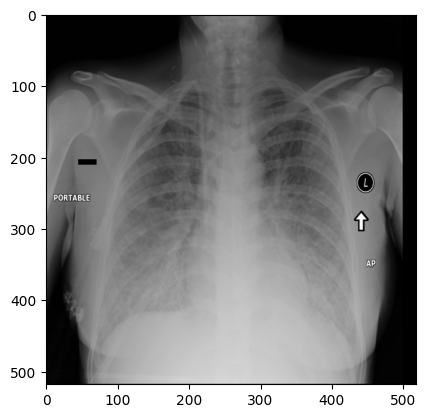

In [39]:
from torchvision.transforms.functional import to_pil_image

# Processor normalization uses mean/std in 0–1 range
img_denorm = images[1].clone()
img_denorm = img_denorm * torch.tensor(MedicalImageTransformerEncoder().processor.image_std).view(3,1,1)
img_denorm = img_denorm + torch.tensor(MedicalImageTransformerEncoder().processor.image_mean).view(3,1,1)
img_pil = to_pil_image(img_denorm.clamp(0,1))

plt.imshow(img_pil)

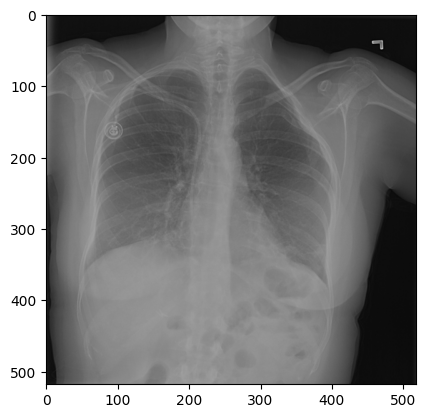

In [40]:
from torchvision.transforms.functional import to_pil_image

# Processor normalization uses mean/std in 0–1 range
img_denorm = images[0].clone()
img_denorm = img_denorm * torch.tensor(MedicalImageTransformerEncoder().processor.image_std).view(3,1,1)
img_denorm = img_denorm + torch.tensor(MedicalImageTransformerEncoder().processor.image_mean).view(3,1,1)
img_pil = to_pil_image(img_denorm.clamp(0,1))

plt.imshow(img_pil)

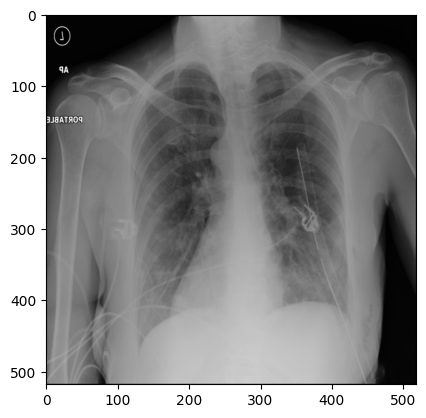

In [41]:
from torchvision.transforms.functional import to_pil_image

# Processor normalization uses mean/std in 0–1 range
img_denorm = images[2].clone()
img_denorm = img_denorm * torch.tensor(MedicalImageTransformerEncoder().processor.image_std).view(3,1,1)
img_denorm = img_denorm + torch.tensor(MedicalImageTransformerEncoder().processor.image_mean).view(3,1,1)
img_pil = to_pil_image(img_denorm.clamp(0,1))

plt.imshow(img_pil)

In [42]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

In [43]:
os.makedirs("/kaggle/working/models", exist_ok=True)

In [44]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ============================================================
# 2️⃣ HELPER FUNCTIONS
# ============================================================
def multilabel_accuracy(preds, targets, threshold):
    preds = (torch.sigmoid(preds) > 0.5).float()
    correct = (preds == targets).float()
    return correct.mean().item()

def multilabel_f1(preds, targets, threshold):
    preds = (torch.sigmoid(preds) > 0.5).cpu().numpy()
    targets = targets.cpu().numpy()
    f1s = f1_score(targets, preds, average=None,zero_division=0)
    f1_dict = {target_labels[i]: f1 for i, f1 in enumerate(f1s)}
    precision = precision_score(targets, preds, average="micro", zero_division=0)
    recall = recall_score(targets, preds, average="micro", zero_division=0)

    return f1_score(targets, preds, average="micro", zero_division=0), precision, recall, f1_dict

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_auc_score
import numpy as np

def multilabel_auc_roc_from_probs(y_pred, y_true, target_labels):
    """
    y_pred: numpy array probabilities (N, num_labels)
    y_true: numpy array labels (N, num_labels)
    """
    auc_dict = {}

    for i, label in enumerate(target_labels):
        if len(np.unique(y_true[:, i])) < 2:
            auc_dict[label] = np.nan
        else:
            auc_dict[label] = roc_auc_score(y_true[:, i], y_pred[:, i])

    macro_auc = float(np.nanmean(list(auc_dict.values())))

    try:
        micro_auc = roc_auc_score(y_true, y_pred, average="micro")
    except ValueError:
        micro_auc = np.nan

    return macro_auc, micro_auc, auc_dict

In [46]:
from torch.utils.data import WeightedRandomSampler
# ============================================================
# 3️⃣ DATALOADER OPTIMIZATION (prefetch, pin_memory, etc.)
# ============================================================
def get_train_dataloader(dataset, batch_size=16):
    optimal_workers = min(8, os.cpu_count() // 2)
    return DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=optimal_workers,
        pin_memory=True,
        prefetch_factor=4,
        persistent_workers=True
    )
def get_val_dataloader(dataset, batch_size=16, shuffle=False):
    optimal_workers = min(8, os.cpu_count() // 2)
    return DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        num_workers=optimal_workers,
        pin_memory=True,
        prefetch_factor=4,
        persistent_workers=True
    )

In [47]:
!pip install iterative-stratification

In [48]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import numpy as np
import pandas as pd

num_shards = 1
test_size = 1 / num_shards  # e.g., 0.25 for 4 equal shards


y_expanded = pd.DataFrame(df_train_final["Encoded"].to_list())
y_expanded.columns = [f"Label_{i}" for i in range(y_expanded.shape[1])]

feature_cols = list(df_train_final.drop("Encoded", axis=1).columns)
label_cols = list(y_expanded.columns)

remaining_X = df_train_final[feature_cols].to_numpy()
remaining_y = y_expanded[label_cols].to_numpy().astype(int)

train_shards = []
remaining_idx = np.arange(len(df_train_final))

for shard_idx in range(num_shards - 1):
    # Stratified random split
    msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42 + shard_idx)
    for train_idx, test_idx in msss.split(remaining_X, remaining_y):
        X_shard = remaining_X[test_idx]
        y_shard = remaining_y[test_idx]

        # Build shard DataFrame
        df_shard = pd.DataFrame(
            np.hstack([X_shard, y_shard]),
            columns=feature_cols + label_cols
        )

        # Collapse labels back into a single list per row
        df_shard["Encoded"] = df_shard[label_cols].values.tolist()
        df_shard.drop(columns=label_cols, inplace=True)

        train_shards.append(df_shard)

        # Update remaining pool
        remaining_X = remaining_X[train_idx]
        remaining_y = remaining_y[train_idx]
        remaining_idx = remaining_idx[train_idx]
        break

# Last shard = whatever remains
df_shard_last = pd.DataFrame(
    np.hstack([remaining_X, remaining_y]),
    columns=feature_cols + label_cols
)
df_shard_last["Encoded"] = df_shard_last[label_cols].values.tolist()
df_shard_last.drop(columns=label_cols, inplace=True)
train_shards.append(df_shard_last)

# Print shard info
for i, s in enumerate(train_shards, 1):
    print(f"✅ Shard {i}: {s.shape}")


✅ Shard 1: (13315, 4)


In [49]:
import numpy as np
from sklearn.metrics import precision_recall_curve

def optimize_thresholds(y_true, y_pred, min_thr=0.05, max_thr=0.95):
    """
    Returns array of per-class thresholds maximizing F1.
    """
    thresholds = []
    for i in range(y_true.shape[1]):
        p, r, thr = precision_recall_curve(y_true[:, i], y_pred[:, i])
        f1 = 2 * p * r / (p + r + 1e-8)
        if len(thr) > 0:
            thresholds.append(np.clip(thr[np.nanargmax(f1)], min_thr, max_thr))
        else:
            thresholds.append(0.5)
    return np.array(thresholds)

In [50]:
from tqdm import tqdm
val_dataset = ChestDataset(df_val_final, train=False)
val_loader = get_val_dataloader(val_dataset, shuffle=False)

# ============================================================
# 5️⃣ TRAINING LOOP
# ============================================================
device = "cuda" if torch.cuda.is_available() else "cpu"
num_epochs = 12
best_val_loss = float("inf")

training_history = {
    "epoch": [], "shard": [],
    "train_loss": [], "val_loss": [],
    "train_acc": [], "val_acc": [],
    "train_f1": [], "val_f1": [],
    "time_min": []
}

f1_each_target_label_val = { }
for i, label in enumerate(target_labels):
      f1_each_target_label_val[label] = 0.0

f1_each_target_label = { }
for i, label in enumerate(target_labels):
    f1_each_target_label[label] = 0.0

for epoch in range(num_epochs):
    
    if epoch == 2:
        optimizer,_ = unfreeze_last_layers(model.encoder, model = model, base_lr = 5e-5, num_layers=1)
    elif epoch == 6:
        optimizer,_ = unfreeze_last_layers(model.encoder, model = model, base_lr = 2e-5, num_layers=2)
    elif epoch == 10:
        optimizer,_ = unfreeze_last_layers(model.encoder, model = model, base_lr = 1e-5, num_layers=3)

    shard_idx = epoch % num_shards
    shard_df = train_shards[shard_idx]
    train_dataset = ChestDataset(shard_df, train=True)
    train_loader = get_train_dataloader(train_dataset)

    print(f"\n🔄 Epoch {epoch+1}/{num_epochs} | Shard {shard_idx+1}/{num_shards} ({len(shard_df)} samples)")
    start_time = time.time()

    # ----------------------- TRAIN -----------------------
    model.train()
    total_train_loss, total_train_acc, total_train_f1, total_precision, total_recall = 0.0, 0.0, 0.0, 0.0, 0.0

    train_bar = tqdm(train_loader, desc=f"Training [Shard {shard_idx+1}]", leave=False)

    for img, age, gender, labels in train_bar:
        img = img.to(device, non_blocking=True)
        age = age.to(device, non_blocking=True)
        gender = gender.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        logits, _ = model(img, age, gender)      # logits (no sigmoid inside model)
        loss = hybrid_loss(
            outputs=logits,
            targets=labels,
            pos_weight=weights,
            alpha=0.7,
            beta=0.3,
            gamma=1.5,
            bce_weight=0.65,
            focal_weight=0.35,
            no_finding_scale=0.025,
        )
        loss.backward()


        if not torch.isfinite(loss):
          print("Skipping batch due to non-finite loss")
          continue

        optimizer.step()

        total_train_loss += loss.item()
        probs = torch.sigmoid(logits)
        total_train_acc += multilabel_accuracy(logits, labels, thresholds)
        f1, precision, recall, f1_dict = multilabel_f1(logits, labels, thresholds)
        total_train_f1 += f1
        total_precision += precision
        total_recall += recall

        for key, value in f1_dict.items():
            f1_each_target_label[key] += value

        train_bar.set_postfix(loss=f"{total_train_loss / (train_bar.n + 1):.4f}")

    avg_train_loss = total_train_loss / len(train_loader)
    avg_train_acc = total_train_acc / len(train_loader)
    avg_train_f1 = total_train_f1 / len(train_loader)
    avg_train_precision = total_precision / len(train_loader)
    avg_train_recall = total_recall / len(train_loader)
    for key, value in f1_each_target_label.items():
        f1_each_target_label[key] = value / len(train_loader)

    # ----------------------- VALIDATION -----------------------
    model.eval()
    total_val_loss, total_val_acc, total_val_f1, total_val_precision, total_val_recall = 0.0, 0.0, 0.0, 0.0, 0.0

    val_bar = tqdm(val_loader, desc="Validating", leave=False)
    all_probs, all_labels = [], []

    with torch.no_grad():
        for img, age, gender, labels in val_bar:
            img = img.to(device, non_blocking=True)
            age = age.to(device, non_blocking=True)
            gender = gender.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)

            outputs, _ = model(img, age, gender)
            loss = hybrid_loss(
            outputs=outputs,
            targets=labels,
            pos_weight=weights,
            alpha=0.7,
            beta=0.3,
            gamma=1.5,
            bce_weight=0.65,
            focal_weight=0.35,
            no_finding_scale=0.025,
            )
            total_val_loss += loss.item()
            probs = torch.sigmoid(outputs).detach().cpu().numpy()
            all_probs.append(probs)
            all_labels.append(labels.detach().cpu().numpy())
    
            # Metrics (batch-wise)
            total_val_acc += multilabel_accuracy(outputs, labels, thresholds)
            f1, precision, recall, f1_dict = multilabel_f1(outputs, labels, thresholds)
            total_val_f1 += f1
            total_val_precision += precision
            total_val_recall += recall
    
            for key, value in f1_dict.items():
                f1_each_target_label_val[key] += value
    
            val_bar.set_postfix(loss=f"{total_val_loss / (val_bar.n + 1):.4f}")
    
    # --- Concatenate all val batches ---
    y_pred = np.concatenate(all_probs, axis=0)   # (N, 14)
    y_true = np.concatenate(all_labels, axis=0) # (N, 14)
    
    # --- AUROC (use probs + labels) ---
    macro_auc, micro_auc, auc_dict = multilabel_auc_roc_from_probs(
        y_pred, y_true, target_labels
    )

    print(f"Macro AUROC: {macro_auc:.4f} | Micro AUROC: {micro_auc:.4f}")
    print(auc_dict)

    #best_thr = optimize_thresholds(y_true, y_pred)
    #print("Optimal per-class thresholds:", np.round(best_thr, 3))    

    avg_val_loss = total_val_loss / len(val_loader)
    avg_val_acc = total_val_acc / len(val_loader)
    avg_val_f1 = total_val_f1 / len(val_loader)
    avg_val_precision = total_val_precision / len(val_loader)
    avg_val_recall = total_val_recall / len(val_loader)
    for key, value in f1_each_target_label_val.items():
        f1_each_target_label_val[key] = (value / len(val_loader))


    elapsed = (time.time() - start_time) / 60

    print(
        f"\n🧠 Epoch {epoch+1}/{num_epochs} | Shard {shard_idx+1}/{num_shards} | "
        f"⏱️ {elapsed:.1f} min | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}\n"
        f"Train Acc: {avg_train_acc:.4f} | Val Acc: {avg_val_acc:.4f} | "
        f"Train F1: {avg_train_f1:.4f} | Val F1: {avg_val_f1:.4f} \n"
        f"Train Precision: {avg_train_precision:.4f} | Val Precision: {avg_val_precision:.4f}\n"
        f"Train Recall: {avg_train_recall:.4f} | Val Recall: {avg_val_recall:.4f}\n"
    )
    """
    if (epoch+1)%3==0:

      for key, value in f1_each_target_label.items():
          print(f" Train:  {key}: {value*100/(epoch+1):.2f}\n")

      for key, value in f1_each_target_label_val.items():
          print(f" Val:    {key}: {value*100/(epoch+1):.2f}\n")
    """

    # ----------------------- SAVE HISTORY -----------------------
    training_history["epoch"].append(epoch + 1)
    training_history["shard"].append(shard_idx + 1)
    training_history["train_loss"].append(avg_train_loss)
    training_history["val_loss"].append(avg_val_loss)
    training_history["train_acc"].append(avg_train_acc)
    training_history["val_acc"].append(avg_val_acc)
    training_history["train_f1"].append(avg_train_f1)
    training_history["val_f1"].append(avg_val_f1)
    training_history["time_min"].append(elapsed)

    # ----------------------- SAVE BEST MODEL -----------------------
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "/kaggle/working/models/best_model.pth")
        print(f"✅ Saved new best model (Val Loss={best_val_loss:.4f})")

    # ----------------------- SCHEDULER -----------------------
    if "scheduler" in locals():
        scheduler.step(avg_val_loss)

# ============================================================
# 6️⃣ SAVE TRAINING HISTORY
# ============================================================
history_df = pd.DataFrame(training_history)
history_path = "/kaggle/working/models/training_history.csv"
history_df.to_csv(history_path, index=False)
print(f"\n📊 Training history saved to {history_path}")



🔄 Epoch 1/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.7183 | Micro AUROC: 0.8239
{'Emphysema': 0.8674360863277947, 'Infiltration': 0.658642728033241, 'Pleural_Thickening': 0.7188560787443469, 'Pneumothorax': 0.7883638497153054, 'Cardiomegaly': 0.5968525327918336, 'Atelectasis': 0.7379559050586953, 'Edema': 0.7973933180829733, 'Effusion': 0.7912478896925028, 'Consolidation': 0.6960870007977054, 'Mass': 0.7402274913537219, 'Nodule': 0.6615943513546543, 'Fibrosis': 0.6810034066274389, 'Pneumonia': 0.5963310393196862, 'Hernia': 0.7239300783604581}

🧠 Epoch 1/12 | Shard 1/1 | ⏱️ 14.7 min | Train Loss: 0.3746 | Val Loss: 0.3296
Train Acc: 0.8828 | Val Acc: 0.8919 | Train F1: 0.2780 | Val F1: 0.3495 
Train Precision: 0.3390 | Val Precision: 0.3938
Train Recall: 0.2458 | Val Recall: 0.3236

✅ Saved new best model (Val Loss=0.3296)

🔄 Epoch 2/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.7638 | Micro AUROC: 0.8506
{'Emphysema': 0.9106709230307495, 'Infiltration': 0.6706531806174291, 'Pleural_Thickening': 0.7385474860335196, 'Pneumothorax': 0.8329756284408829, 'Cardiomegaly': 0.7732309789071218, 'Atelectasis': 0.7744345400933645, 'Edema': 0.8312406450337485, 'Effusion': 0.8329255047767945, 'Consolidation': 0.7094188631850507, 'Mass': 0.7958726509828639, 'Nodule': 0.7128584316347142, 'Fibrosis': 0.7040662743883555, 'Pneumonia': 0.5887125761627142, 'Hernia': 0.817085867718779}

🧠 Epoch 2/12 | Shard 1/1 | ⏱️ 14.7 min | Train Loss: 0.3362 | Val Loss: 0.3061
Train Acc: 0.8953 | Val Acc: 0.9017 | Train F1: 0.3759 | Val F1: 0.3985 
Train Precision: 0.4209 | Val Precision: 0.4478
Train Recall: 0.3479 | Val Recall: 0.3738

✅ Saved new best model (Val Loss=0.3061)
🔎 Found encoder blocks via children() (total 5).
✅ Unfroze last 1 blocks -> block indices [3] (if cumulative, earlier indices remain).
Encoder trainable params: 434,305 / 86,976,385
Model trainable params

Macro AUROC: 0.7759 | Micro AUROC: 0.8555
{'Emphysema': 0.922329540803798, 'Infiltration': 0.6711924270897227, 'Pleural_Thickening': 0.750233218054447, 'Pneumothorax': 0.8446035707662889, 'Cardiomegaly': 0.7928511973364067, 'Atelectasis': 0.7826619859828701, 'Edema': 0.8437289954531333, 'Effusion': 0.8443611269863167, 'Consolidation': 0.7096098032892615, 'Mass': 0.8169852245972451, 'Nodule': 0.7347093729557985, 'Fibrosis': 0.7078693093837101, 'Pneumonia': 0.5921886643580414, 'Hernia': 0.8496355964710395}

🧠 Epoch 3/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.3206 | Val Loss: 0.2979
Train Acc: 0.8994 | Val Acc: 0.8993 | Train F1: 0.4158 | Val F1: 0.4056 
Train Precision: 0.4517 | Val Precision: 0.4417
Train Recall: 0.3934 | Val Recall: 0.3910

✅ Saved new best model (Val Loss=0.2979)

🔄 Epoch 4/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.7861 | Micro AUROC: 0.8600
{'Emphysema': 0.9240348148754467, 'Infiltration': 0.6806300549265705, 'Pleural_Thickening': 0.7577972865123703, 'Pneumothorax': 0.8457374851420738, 'Cardiomegaly': 0.8095169493075756, 'Atelectasis': 0.7903649506047393, 'Edema': 0.8567228670676946, 'Effusion': 0.8498435471121359, 'Consolidation': 0.715728372850863, 'Mass': 0.8281270276783894, 'Nodule': 0.7463851329494728, 'Fibrosis': 0.7243666769897802, 'Pneumonia': 0.6170604479901811, 'Hernia': 0.8597731382541507}

🧠 Epoch 4/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.3142 | Val Loss: 0.2923
Train Acc: 0.9006 | Val Acc: 0.9053 | Train F1: 0.4277 | Val F1: 0.4163 
Train Precision: 0.4582 | Val Precision: 0.4678
Train Recall: 0.4089 | Val Recall: 0.3893

✅ Saved new best model (Val Loss=0.2923)

🔄 Epoch 5/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.7919 | Micro AUROC: 0.8648
{'Emphysema': 0.9233336061771846, 'Infiltration': 0.6831263099331318, 'Pleural_Thickening': 0.7629227631462269, 'Pneumothorax': 0.850615140948901, 'Cardiomegaly': 0.8181173737262867, 'Atelectasis': 0.7979574683073981, 'Edema': 0.865042785732441, 'Effusion': 0.8555838024730286, 'Consolidation': 0.717055052982343, 'Mass': 0.8369216160043175, 'Nodule': 0.7528322299138112, 'Fibrosis': 0.7321306906162899, 'Pneumonia': 0.6230745627493096, 'Hernia': 0.8674995890185764}

🧠 Epoch 5/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.3083 | Val Loss: 0.2863
Train Acc: 0.9020 | Val Acc: 0.9053 | Train F1: 0.4392 | Val F1: 0.4273 
Train Precision: 0.4684 | Val Precision: 0.4687
Train Recall: 0.4215 | Val Recall: 0.4076

✅ Saved new best model (Val Loss=0.2863)

🔄 Epoch 6/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.7989 | Micro AUROC: 0.8664
{'Emphysema': 0.9229679954162233, 'Infiltration': 0.6872765527976874, 'Pleural_Thickening': 0.7667961337235079, 'Pneumothorax': 0.8547388804951527, 'Cardiomegaly': 0.8369715346761063, 'Atelectasis': 0.8041306014995859, 'Edema': 0.8696404868818663, 'Effusion': 0.8585409700735951, 'Consolidation': 0.7168344110841437, 'Mass': 0.8450745567688154, 'Nodule': 0.7605328042670347, 'Fibrosis': 0.7421740476927841, 'Pneumonia': 0.6430061806864507, 'Hernia': 0.8765411803386486}

🧠 Epoch 6/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.3040 | Val Loss: 0.2828
Train Acc: 0.9029 | Val Acc: 0.9053 | Train F1: 0.4458 | Val F1: 0.4320 
Train Precision: 0.4737 | Val Precision: 0.4719
Train Recall: 0.4291 | Val Recall: 0.4145

✅ Saved new best model (Val Loss=0.2828)
🔎 Found encoder blocks via children() (total 5).
✅ Unfroze last 2 blocks -> block indices [2, 3] (if cumulative, earlier indices remain).
Encoder trainable params: 434,305 / 86,976,385
Model trainable pa

Macro AUROC: 0.8001 | Micro AUROC: 0.8685
{'Emphysema': 0.9234591143488582, 'Infiltration': 0.690796724444238, 'Pleural_Thickening': 0.7679400549791612, 'Pneumothorax': 0.8551355985274313, 'Cardiomegaly': 0.840765234253517, 'Atelectasis': 0.8037890656417193, 'Edema': 0.8716089129882233, 'Effusion': 0.8595739532765329, 'Consolidation': 0.7190959905406858, 'Mass': 0.8453763268097447, 'Nodule': 0.7617934700567166, 'Fibrosis': 0.7428027253019511, 'Pneumonia': 0.6361548240038574, 'Hernia': 0.8825141103622115}

🧠 Epoch 7/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.2994 | Val Loss: 0.2810
Train Acc: 0.9047 | Val Acc: 0.9063 | Train F1: 0.4569 | Val F1: 0.4358 
Train Precision: 0.4842 | Val Precision: 0.4751
Train Recall: 0.4401 | Val Recall: 0.4176

✅ Saved new best model (Val Loss=0.2810)

🔄 Epoch 8/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.8011 | Micro AUROC: 0.8684
{'Emphysema': 0.9229761807317672, 'Infiltration': 0.6901438452183418, 'Pleural_Thickening': 0.7687576483107209, 'Pneumothorax': 0.8581467035923501, 'Cardiomegaly': 0.8429765106196148, 'Atelectasis': 0.8052390354528945, 'Edema': 0.8725380552966762, 'Effusion': 0.8604706286800369, 'Consolidation': 0.721036507747925, 'Mass': 0.846584436905343, 'Nodule': 0.7617898758563182, 'Fibrosis': 0.7439269123567668, 'Pneumonia': 0.6369832989961864, 'Hernia': 0.8840484410104663}

🧠 Epoch 8/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.2975 | Val Loss: 0.2797
Train Acc: 0.9051 | Val Acc: 0.9063 | Train F1: 0.4617 | Val F1: 0.4419 
Train Precision: 0.4868 | Val Precision: 0.4776
Train Recall: 0.4474 | Val Recall: 0.4270

✅ Saved new best model (Val Loss=0.2797)

🔄 Epoch 9/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.8024 | Micro AUROC: 0.8693
{'Emphysema': 0.9227333497039645, 'Infiltration': 0.6947767218213172, 'Pleural_Thickening': 0.7709000620732465, 'Pneumothorax': 0.858409662288075, 'Cardiomegaly': 0.8431983242778479, 'Atelectasis': 0.807574846195585, 'Edema': 0.8736451184727049, 'Effusion': 0.8614154771210917, 'Consolidation': 0.7224395639210894, 'Mass': 0.8479336476685432, 'Nodule': 0.762701904207371, 'Fibrosis': 0.746924744502942, 'Pneumonia': 0.6334721430763162, 'Hernia': 0.887747273823223}

🧠 Epoch 9/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.2963 | Val Loss: 0.2789
Train Acc: 0.9046 | Val Acc: 0.9077 | Train F1: 0.4604 | Val F1: 0.4449 
Train Precision: 0.4841 | Val Precision: 0.4835
Train Recall: 0.4470 | Val Recall: 0.4277

✅ Saved new best model (Val Loss=0.2789)

🔄 Epoch 10/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.8034 | Micro AUROC: 0.8693
{'Emphysema': 0.9217511118386946, 'Infiltration': 0.6966404618947426, 'Pleural_Thickening': 0.7718737252815464, 'Pneumothorax': 0.8587805404485193, 'Cardiomegaly': 0.844410295812524, 'Atelectasis': 0.8056355115731378, 'Edema': 0.8749611680646164, 'Effusion': 0.861913082702157, 'Consolidation': 0.7225017962513507, 'Mass': 0.8492396012927704, 'Nodule': 0.7657183368915916, 'Fibrosis': 0.7470610096004954, 'Pneumonia': 0.6420199009336781, 'Hernia': 0.8851717902350813}

🧠 Epoch 10/12 | Shard 1/1 | ⏱️ 38.0 min | Train Loss: 0.2950 | Val Loss: 0.2780
Train Acc: 0.9058 | Val Acc: 0.9087 | Train F1: 0.4686 | Val F1: 0.4468 
Train Precision: 0.4908 | Val Precision: 0.4900
Train Recall: 0.4559 | Val Recall: 0.4259

✅ Saved new best model (Val Loss=0.2780)
🔎 Found encoder blocks via children() (total 5).
✅ Unfroze last 3 blocks -> block indices [1, 2, 3] (if cumulative, earlier indices remain).
Encoder trainable params: 434,305 / 86,976,385
Model trainable 

Macro AUROC: 0.8040 | Micro AUROC: 0.8713
{'Emphysema': 0.9213418460614989, 'Infiltration': 0.6958022676047274, 'Pleural_Thickening': 0.7729537997694423, 'Pneumothorax': 0.8586270212099748, 'Cardiomegaly': 0.8486636298776137, 'Atelectasis': 0.8076405479526538, 'Edema': 0.8752435821401339, 'Effusion': 0.8622853289014139, 'Consolidation': 0.7244324128605938, 'Mass': 0.8491293985815778, 'Nodule': 0.7650668880694113, 'Fibrosis': 0.7481666150510994, 'Pneumonia': 0.636207425590672, 'Hernia': 0.8904871499808208}

🧠 Epoch 11/12 | Shard 1/1 | ⏱️ 38.1 min | Train Loss: 0.2935 | Val Loss: 0.2769
Train Acc: 0.9059 | Val Acc: 0.9080 | Train F1: 0.4669 | Val F1: 0.4469 
Train Precision: 0.4932 | Val Precision: 0.4861
Train Recall: 0.4519 | Val Recall: 0.4298

✅ Saved new best model (Val Loss=0.2769)

🔄 Epoch 12/12 | Shard 1/1 (13315 samples)


Macro AUROC: 0.8047 | Micro AUROC: 0.8716
{'Emphysema': 0.9213745873236746, 'Infiltration': 0.697855395600824, 'Pleural_Thickening': 0.7735567970204842, 'Pneumothorax': 0.8594827769654262, 'Cardiomegaly': 0.8493176371585898, 'Atelectasis': 0.8081021594355087, 'Edema': 0.8761021209297073, 'Effusion': 0.862704653296459, 'Consolidation': 0.7249005697086961, 'Mass': 0.8490088965515821, 'Nodule': 0.765420018258538, 'Fibrosis': 0.7479792505419635, 'Pneumonia': 0.6389996931574102, 'Hernia': 0.891528302920708}

🧠 Epoch 12/12 | Shard 1/1 | ⏱️ 38.1 min | Train Loss: 0.2930 | Val Loss: 0.2769
Train Acc: 0.9063 | Val Acc: 0.9090 | Train F1: 0.4700 | Val F1: 0.4468 
Train Precision: 0.4942 | Val Precision: 0.4909
Train Recall: 0.4560 | Val Recall: 0.4253

✅ Saved new best model (Val Loss=0.2769)

📊 Training history saved to /kaggle/working/models/training_history.csv


In [51]:
import matplotlib.pyplot as plt
#history_df = pd.read_csv("/kaggle/working/models/training_history.csv")

import matplotlib.pyplot as plt

epochs = list(range(1, 12))  # you shared 1..11

train_loss = [0.3727, 0.3359, 0.3203, 0.3127, 0.3077, 0.3026, 0.2990, 0.2971, 0.2964, 0.2944, 0.2930]
val_loss   = [0.3326, 0.3073, 0.2973, 0.2918, 0.2875, 0.2835, 0.2821, 0.2800, 0.2788, 0.2775, 0.2771]

train_f1 = [0.2728, 0.3769, 0.4138, 0.4307, 0.4394, 0.4501, 0.4575, 0.4591, 0.4608, 0.4658, 0.4695]
val_f1   = [0.3270, 0.3929, 0.4063, 0.4141, 0.4203, 0.4315, 0.4293, 0.4332, 0.4368, 0.4392, 0.4413]


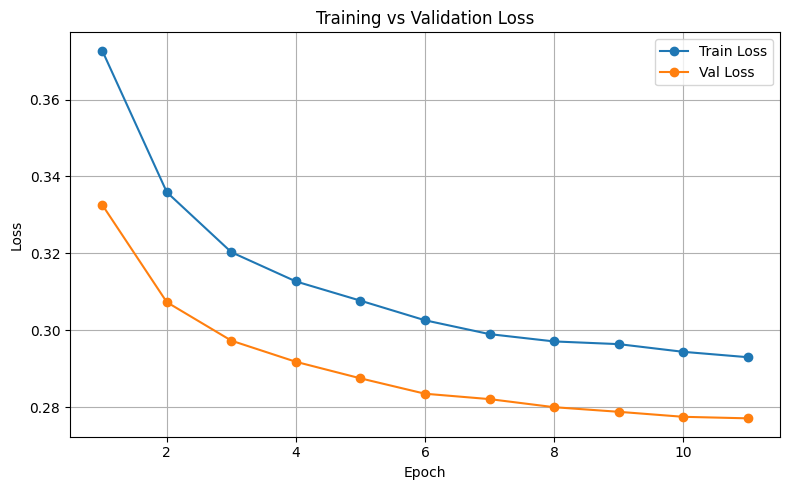

In [52]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker="o", label="Train Loss")
plt.plot(epochs, val_loss, marker="o", label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

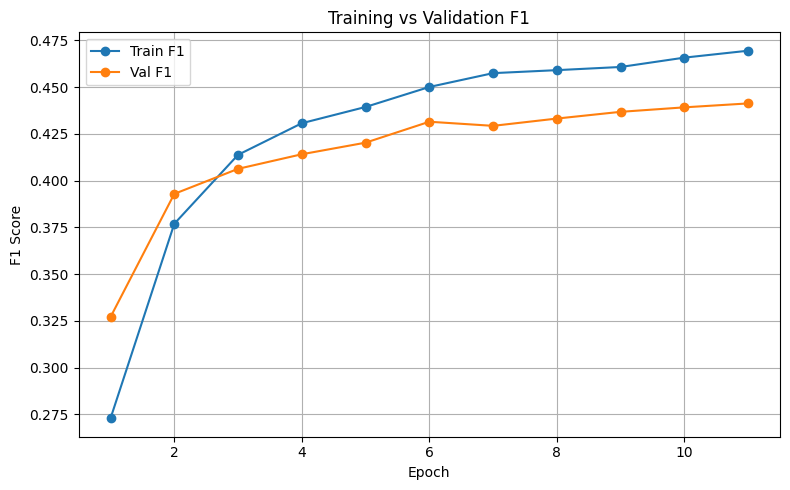

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_f1, marker="o", label="Train F1")
plt.plot(epochs, val_f1, marker="o", label="Val F1")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("Training vs Validation F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
import matplotlib.pyplot as plt

epochs = list(range(1, 12))

macro_auroc = [
    0.7106, 0.7631, 0.7789, 0.7904, 0.7973,
    0.8027, 0.8067, 0.8086, 0.8104, 0.8126, 0.8132
]

micro_auroc = [
    0.8217, 0.8479, 0.8580, 0.8609, 0.8633,
    0.8694, 0.8684, 0.8699, 0.8713, 0.8715, 0.8722
]

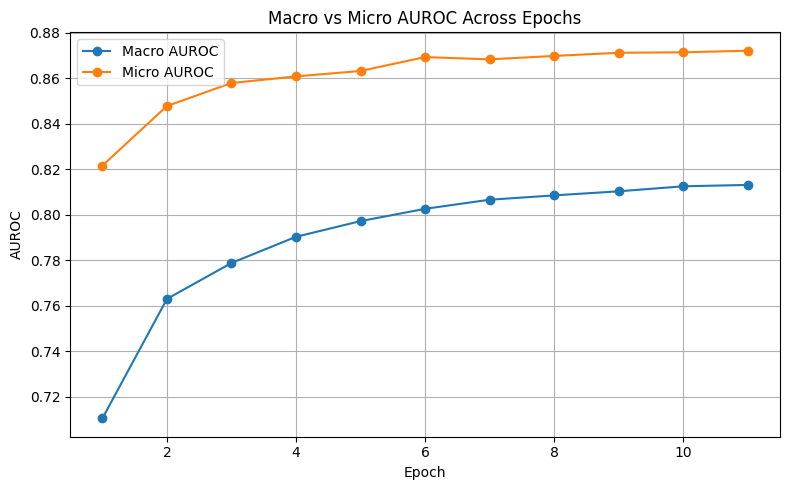

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(epochs, macro_auroc, marker="o", label="Macro AUROC")
plt.plot(epochs, micro_auroc, marker="o", label="Micro AUROC")

plt.xlabel("Epoch")
plt.ylabel("AUROC")
plt.title("Macro vs Micro AUROC Across Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()